In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
small_3 = np.load('smallest_three.npy')
small_21 = np.load('small_21.npy')

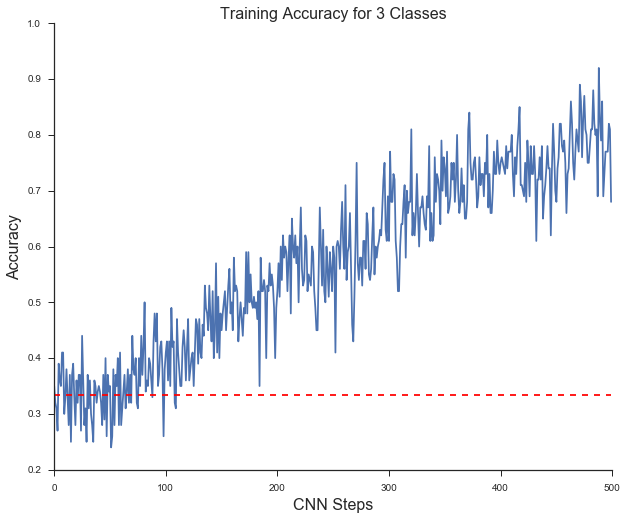

In [70]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
plt.plot(small_3)
plt.plot(0.3333*np.ones(len(small_3)), 'r--')
plt.title('Training Accuracy for 3 Classes', fontsize=16)
plt.xlabel('CNN Steps', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
sns.despine()
plt.savefig('small_3.png', bbox_inches='tight')

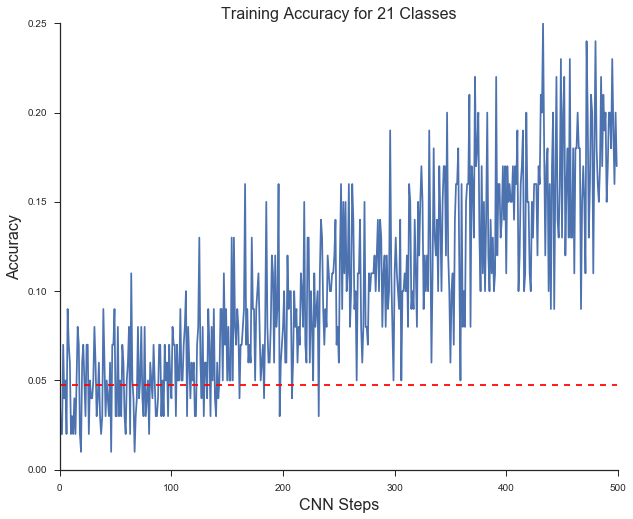

In [71]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
plt.plot(small_21)
plt.plot((1/21.0)*np.ones(len(small_3)), 'r--')
plt.title('Training Accuracy for 21 Classes', fontsize=16)
plt.xlabel('CNN Steps', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
sns.despine()
plt.savefig('small_21.png', bbox_inches='tight')

In [68]:
x=np.array(small_3)
n=x.size
A=x.reshape(10,n/10)
y_3=A.mean(axis=1)

x=np.array(small_21)
n=x.size
A=x.reshape(10,n/10)
y_21=A.mean(axis=0)


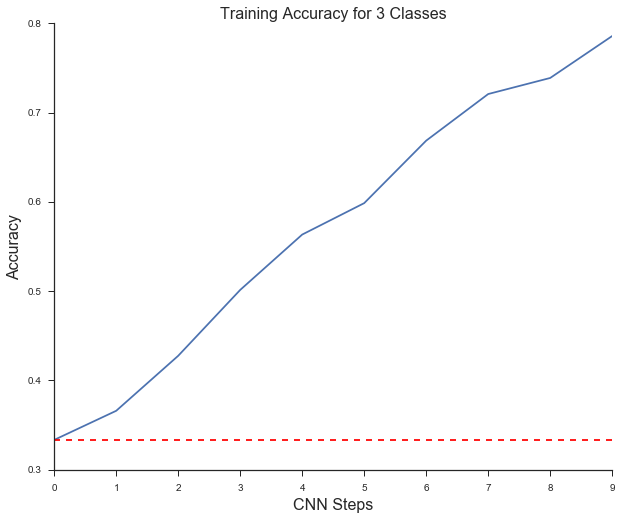

In [69]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
plt.plot(y_3)
plt.plot(0.3333*np.ones(len(y_3)), 'r--')
plt.title('Training Accuracy for 3 Classes', fontsize=16)
plt.xlabel('CNN Steps', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
sns.despine()
plt.savefig('small_3_avg.png', bbox_inches='tight')


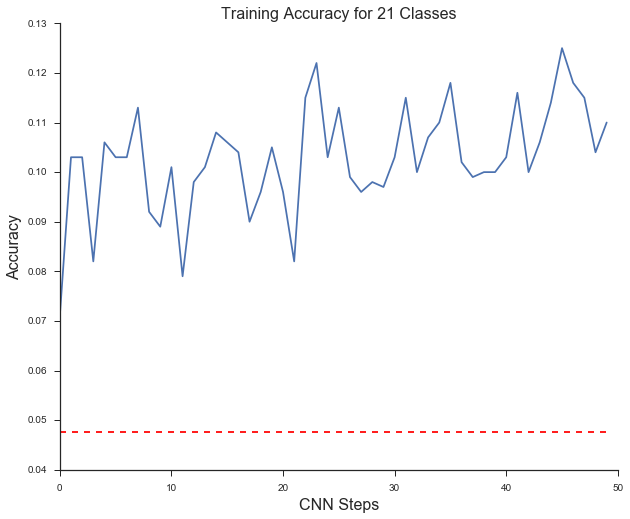

In [65]:
plt.figure(figsize=(10,8))
sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
plt.plot(y_21)
plt.plot((1/21.0)*np.ones(len(y_21)), 'r--')
plt.title('Training Accuracy for 21 Classes', fontsize=16)
plt.xlabel('CNN Steps', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.savefig('small_21_avg.png', bbox_inches='tight')
sns.despine()

In [67]:
np.mean(small_3[0:10])

0.347